## Task 1 and 2

Date: 29/8/21

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction
Brief information of this assessment, e.g., what problems were this assessment tackling, what problems were discovered in the data while you were parsing or cleansing it, and the approaches you chose to handle them, etc.

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import numpy as np
import re
import xml.etree.ElementTree as et

# Import visualisation tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use('ggplot')

# default='warn'
pd.options.mode.chained_assignment = None  

## Task 1. Parsing Data

### 1.1. Examining and loading data
Examine "\<student\_id\>_dataset1.xml" to determine its content and structure, then load it into Python. Explain your findings here, e.g., how are the records are stored? 

In [2]:
# Code to inspect the provided data file
tree = et.parse('dataset1.xml')
root = tree.getroot()
root.tag
# Couple of notes for all code block in this notebook
## please provide proper comment on your code
## Please re-start and run all cells to make sure codes are runable and include your output in the submission

'JobAds'

### Table to record Errorlist 

In [3]:
columnlist = ['index','Id', 'ColumnName', 'Original', 'Modified', 'ErrorType', 'Fixing']
errorlist = pd.DataFrame(columns=columnlist)
errorlist

#update error list by attributes
def update_Err(indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing):
    errorElem= [indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing]
    errorlist.loc[len(errorlist)] = errorElem

### Converting Id to int datatype

In [4]:
len(root[0])

7384

In [5]:
for child in root[0][1]:
    print(child)

<Element 'Id' at 0x7fa2f79cdb30>
<Element 'Title' at 0x7fa2f79cdb90>
<Element 'Location' at 0x7fa2f79cdbf0>
<Element 'Company' at 0x7fa2f79cdc50>
<Element 'ContractTime' at 0x7fa2f79cdcb0>
<Element 'Category' at 0x7fa2f79cdd10>
<Element 'Salary' at 0x7fa2f79cdd70>


In [6]:
for child in root:
    print(child)

<Element 'Source' at 0x7fa2f79cd830>
<Element 'Source' at 0x7fa2f8685b30>
<Element 'Source' at 0x7fa2f94f84d0>
<Element 'Source' at 0x7fa2f9510ad0>
<Element 'Source' at 0x7fa2f9934410>
<Element 'Source' at 0x7fa2f9a5ab90>
<Element 'Source' at 0x7fa2f9e039b0>
<Element 'Source' at 0x7fa2fa38a290>
<Element 'Source' at 0x7fa2fa3acf50>
<Element 'Source' at 0x7fa2fa3b9ad0>
<Element 'Source' at 0x7fa2fa4cea10>
<Element 'Source' at 0x7fa2fa7a6410>
<Element 'Source' at 0x7fa2fab55fb0>
<Element 'Source' at 0x7fa2fad65fb0>
<Element 'Source' at 0x7fa2fadfa830>
<Element 'Source' at 0x7fa2faeb48f0>
<Element 'Source' at 0x7fa2faf844d0>
<Element 'Source' at 0x7fa2fb1ae410>
<Element 'Source' at 0x7fa2fb1ecf50>
<Element 'Source' at 0x7fa2fb277d70>
<Element 'Source' at 0x7fa2fb472d10>
<Element 'Source' at 0x7fa2fb66da10>
<Element 'Source' at 0x7fa2fb68a2f0>
<Element 'Source' at 0x7fa2fbb7c950>
<Element 'Source' at 0x7fa2fbb9da10>
<Element 'Source' at 0x7fa2fbc2ce90>
<Element 'Source' at 0x7fa2fbcb4b30>
<

In [7]:
#finding the attributes of Date
root[0][1].attrib

{'OpenDate': '20121027T120000', 'CloseDate': '20130125T120000'}

In [8]:
set([child.tag for child in root[1][1]])

{'Category', 'Company', 'ContractTime', 'Id', 'Location', 'Salary', 'Title'}

In [9]:
[set([child.tag for child in root[0]]) for i in range(1, len(root))]

[{'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'SourceName'},
 {'Row', 'Source

## 1.2 Extracting Data with iter()

In [10]:
from itertools import chain
set(chain.from_iterable([[child.tag for child in root[0]] for i in range(0, len(root))]))

{'Row', 'SourceName'}

In [11]:
Id = []
for elem in tree.iter(tag='Id'):
    Id.append(elem.text)  
print(len(Id))
Id

50703


['69019015',
 '69017444',
 '70758181',
 '71631621',
 '69010433',
 '71125352',
 '69083552',
 '64821708',
 '66925303',
 '68997062',
 '69932655',
 '70761340',
 '69006727',
 '68217337',
 '68218046',
 '69006413',
 '71299393',
 '71821041',
 '66010674',
 '66926052',
 '69933677',
 '69081401',
 '69082300',
 '69080568',
 '66926076',
 '69746381',
 '66299706',
 '68355910',
 '70761598',
 '69932264',
 '69537371',
 '69776075',
 '66014933',
 '69022924',
 '69004436',
 '69010437',
 '69748542',
 '69022426',
 '69004881',
 '69558434',
 '69560297',
 '69079605',
 '70438750',
 '70164895',
 '68218315',
 '70579322',
 '61000707',
 '69018919',
 '63721795',
 '65879949',
 '70762398',
 '68996065',
 '66896443',
 '69932741',
 '71298275',
 '69008015',
 '66600426',
 '72635308',
 '69933610',
 '68996668',
 '70769813',
 '71298193',
 '64498645',
 '71630433',
 '70770492',
 '69746412',
 '69931030',
 '66298155',
 '69078804',
 '69541262',
 '69080372',
 '69966659',
 '69933537',
 '66886894',
 '66925263',
 '69007998',
 '72115395',

In [12]:
Title = []
for elem in tree.iter(tag='Title'):
    Title.append(elem.text)  
print(len(Title))
Title

50703


['Field Systems Engineer (Telephony, OO, Java, C++, C)',
 'Head of Architecture x **** (Please Read)',
 'Finance Administration',
 'Project Engineer  Automated Handling',
 'Water Treatment Sales/Accounts Manager  East Midlands',
 'Electrical Maintenance Engineer (Surrey)',
 'Process Engineer  ****  ****  South Wales Casting',
 'Field Business Development Executive  Assets Advisory Firm',
 'Ruby on Rails Developer (Senior) RoR / Ruby / Rails / MySQL',
 'Insurance Sales Consultants',
 'SENCO  Inner London Secondary School',
 'Year **** Primary School Needed',
 'Business Admin L**** NVQ/QCF Assessor',
 'Section Engineer',
 'Lead Engineer/Technical Authority Power Electronics',
 'Graduate LSA',
 'Business Analyst  SDLC  Insurance',
 'Fluid Mechanics Engineer (Oil and Gas)',
 'Instrument Designer',
 'Java Developers',
 'Mental Health Nurse RMN  Tunbridge Wells, Kent',
 'Remediation Business Development Manager  Bristol',
 'WATER TREATMENT/COOLING TOWER TECHNICIAN  INUSTRIAL SERVICES',
 'Fie

In [13]:
#repeated elements e.g London, UK
Location = []
for elem in tree.iter(tag='Location'):
    Location.append(elem.text)  
print(len(Location))
Location

50703


['Weybridge',
 'UK',
 'Doncaster',
 'Bedfordshire',
 'East Midlands',
 'Surrey',
 'Wales',
 'East Midlands',
 'Farnborough',
 'Tunbridge Wells',
 'East London',
 'West London',
 'London',
 'Nottingham',
 'Essex',
 'Greenwich',
 'UK',
 'Ely',
 'UK',
 'Manchester',
 'Tunbridge Wells',
 'Bristol',
 'Burton-On-Trent',
 'London',
 'UK',
 'East Sussex',
 'North East England',
 'UK',
 'Loughborough',
 'London',
 'London',
 'Chichester',
 'UK',
 'London',
 'London',
 'North West England',
 'Hove',
 'Cambridgeshire',
 'UK',
 'UK',
 'London',
 'UK',
 'Manchester',
 'Surrey',
 'Manchester',
 'UK',
 'Buckinghamshire',
 'Reading',
 'UK',
 'South East London',
 'Croydon',
 'Canary Wharf',
 'Guildford',
 'Bradford',
 'UK',
 'Hampshire',
 'London',
 'East Midlands',
 'Colchester',
 'East London',
 'Lancashire',
 'Welwyn Garden City',
 'Liverpool',
 'Sheffield',
 'Cambridgeshire',
 'Derbyshire',
 'Lowestoft',
 'UK',
 'UK',
 'North West England',
 'Bury',
 'UK',
 'Lambeth',
 'Stafford',
 'Crewe',
 'UK',

In [14]:
Company = []
for elem in tree.iter(tag='Company'):
    Company.append(elem.text)  
print(len(Company))
Company

50007


['Spectrum Recruitment',
 'Capita Resourcing',
 'Blue Arrow',
 'V Consultancy',
 'Future Select Recruitment',
 'PRS',
 'Kendall Poole Consulting Limited',
 'RecruitmentRevolution.com',
 'Capita Resourcing',
 'Dream Search Ltd',
 'Edustaff London Ltd',
 'The London Teaching Pool',
 'Alderwood Education',
 'AndersElite',
 'Encore Technical Solutions',
 'Edustaff London Ltd',
 'CPS Group Cardiff',
 'i4 Recruitment',
 'On Line Design Engineering Limited',
 'Accenture',
 'Capita Resourcing',
 'Penguin Recruitment',
 'PMP Solutions Ltd',
 'Thorn Baker Ltd',
 'Portland Resourcing',
 'Opus Mitchell',
 'Frontrunner Recruitment Ltd',
 'Adecco',
 'Protocol Education',
 'The London Teaching Pool',
 'Work Place Group',
 'Beacon Recruitment Services Limited',
 'Lime People South Yorkshire Limited',
 'Red Personnel Ltd',
 'We Are Recruitment',
 'Future Select Recruitment',
 'Interaction Recruitment',
 'Greywood Associates Ltd',
 'Supreme Recruitment',
 'Reed Engineering',
 'Randstad Construction, Pro

In [15]:
#missing values
ContractType = []
for elem in tree.iter(tag='ContractType'):
    ContractType.append(elem.text)  
print(len(ContractType))
ContractType

29428


['part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part_time',
 'part

In [16]:
# missing values
ContractTime = []
for elem in tree.iter(tag='ContractTime'):
    ContractTime.append(elem.text)  
print(len(ContractTime))
ContractTime

49221


['permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'contract',
 'contract',
 'permanent',
 'permanent',
 'contract',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'contract',
 'contract',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'permanent',
 'permanent',
 'permanent',
 'contract',
 'perm

In [17]:
Category = []
for elem in tree.iter(tag='Category'):
    Category.append(elem.text)  
print(len(Category))
Category

50703


['IT Jobs',
 'IT Jobs',
 'Accounting & Finance Jobs',
 'Engineering Jobs',
 'Healthcare & Nursing Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'Sales Jobs',
 'IT Jobs',
 'Accounting & Finance Jobs',
 'Teaching Jobs',
 'Teaching Jobs',
 'Teaching Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'Teaching Jobs',
 'IT Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'IT Jobs',
 'Healthcare & Nursing Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'IT Jobs',
 'Accounting & Finance Jobs',
 'Engineering Jobs',
 'Sales Jobs',
 'Teaching Jobs',
 'Teaching Jobs',
 'Accounting & Finance Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'IT Jobs',
 'Teaching Jobs',
 'Healthcare & Nursing Jobs',
 'Healthcare & Nursing Jobs',
 'IT Jobs',
 'Teaching Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'Engineering Jobs',
 'Accounting & Finance Jobs',
 'Engineering Jobs',
 'IT Jobs',
 'IT Jobs',
 'IT Jobs',
 'Engineering Jobs',
 'Sales Jobs',
 'Engineer

In [18]:
Salary = []
for elem in tree.iter(tag='Salary'):
    Salary.append(elem.text)  
print(len(Salary))
Salary

50542


['47500',
 '87500',
 '13440',
 '37500',
 '50000',
 '27500',
 '37500',
 '27500',
 '52500',
 '21500',
 '50412',
 '33600',
 '22000',
 '34000',
 '45000',
 '14400',
 '40000',
 '41000',
 '54720',
 '33465',
 '25000',
 '42500',
 '34000',
 '35000',
 '75000',
 '57500',
 '34000',
 '22500',
 '30000',
 '30600',
 '36960',
 '18336',
 '37500',
 '33000',
 '32400',
 '18000',
 '13000',
 '24500',
 '15000',
 '45000',
 '36500',
 '27500',
 '26000',
 '55000',
 '32500',
 '57600',
 '32500',
 '37500',
 '29000',
 '26000',
 '28000',
 '22500',
 '0',
 '28K',
 '16000',
 '32000',
 '47500',
 '23296',
 '24000',
 '96000',
 '72000',
 '20160',
 '0',
 '30500',
 '52500',
 '15880',
 '0',
 '32500',
 '31500',
 '57600',
 '19000',
 '23500',
 '28200',
 '14500',
 '42500',
 '33500',
 '24000',
 '57500',
 '16100',
 '17000',
 '31000',
 '24500 - 25500',
 '42500',
 '40000',
 '36000',
 '24500',
 '25000',
 '47500',
 '0',
 '35400',
 '25500',
 '23500',
 '27000',
 '37440',
 '27000',
 '25500',
 '32400',
 '31200',
 '35000',
 '12500',
 '42500',


In [19]:
#Missing Values, a lot of 0's.
OpenDate = [] 
for elem in tree.iter(tag='Row'):
       OpenDate.append(elem.attrib["OpenDate"]) # retrieving value of the attribute OpenDate in Row
print(len(OpenDate))
OpenDate

50703


['20121027T120000',
 '20120111T000000',
 '20120908T000000',
 '20130917T150000',
 '20120528T150000',
 '20130507T150000',
 '20130625T000000',
 '20130725T000000',
 '20130611T000000',
 '20130404T120000',
 '20120313T000000',
 '20130917T120000',
 '20121128T150000',
 '20120415T000000',
 '20130706T120000',
 '20131030T120000',
 '20131029T000000',
 '20120519T150000',
 '20120507T150000',
 '20120308T150000',
 '20120204T150000',
 '20130816T000000',
 '20130120T150000',
 '20130930T000000',
 '20131106T150000',
 '20130709T150000',
 '20130713T150000',
 '20130329T120000',
 '20120123T120000',
 '20120731T150000',
 '20130402T120000',
 '20120217T150000',
 '20130607T120000',
 '20130929T000000',
 '20130919T120000',
 '20120521T000000',
 '20130115T000000',
 '20130720T000000',
 '20130929T000000',
 '20130626T150000',
 '20130922T000000',
 '20121231T120000',
 '20130625T000000',
 '20130223T150000',
 '20120611T120000',
 '20120630T120000',
 '20130415T150000',
 '20121013T120000',
 '20131208T000000',
 '20120420T150000',


In [20]:
CloseDate = [] 
for elem in tree.iter(tag='Row'):
       CloseDate.append(elem.attrib["CloseDate"]) # retrieving value of the attribute CloseDate in Row
print(len(CloseDate))
CloseDate

50703


['20130125T120000',
 '20120311T000000',
 '20121207T000000',
 '20131216T150000',
 '20120627T150000',
 '20130706T150000',
 '20130824T000000',
 '20131023T000000',
 '20130711T000000',
 '20130603T120000',
 '20120412T000000',
 '20131216T120000',
 '20121228T150000',
 '20120515T000000',
 '20130805T120000',
 '20131229T120000',
 '20140127T000000',
 '20120718T150000',
 '20120521T150000',
 '20120606T150000',
 '20120404T150000',
 '20131015T000000',
 '20130321T150000',
 '20131129T000000',
 '20140105T150000',
 '20131007T150000',
 '20130812T150000',
 '20130428T120000',
 '20120323T120000',
 '20120814T150000',
 '20130416T120000',
 '20120517T150000',
 '20130806T120000',
 '20131128T000000',
 '20131019T120000',
 '20120620T000000',
 '20130316T000000',
 '20130918T000000',
 '20131013T000000',
 '20130726T150000',
 '20131121T000000',
 '20130130T120000',
 '20130725T000000',
 '20130325T150000',
 '20120909T120000',
 '20120829T120000',
 '20130614T150000',
 '20121112T120000',
 '20140206T000000',
 '20120520T150000',


In [21]:
JobAds = []
for elem in tree.iter(tag='JobAds'):
    JobAds.append(elem.text)  
print(len(JobAds))
JobAds

1


['\n']

In [22]:
Row = []
for elem in tree.iter(tag='Row'):
    Row.append(elem.text)  
print(len(Row))
Row

50703


['\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',

In [23]:
Source = []
for elem in tree.iter(tag='Source'):
    Source.append(elem.text)  
print(len(Source))
Source

107


['\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n']

## 1.3 Parsing data into the required format

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [24]:
# Code to parse data
len(root[0])

7384

In [25]:
# initialising all the fields to be an empty 
import pandas as pd
dataDict = {}
dataDict['Id'] = []
dataDict['Title'] = []
dataDict['Location'] = []
dataDict['Company'] = []
dataDict['ContractType'] = []
dataDict['ContractTime'] = []
dataDict['Category'] = []
dataDict['Salary'] = []
dataDict['OpenDate'] = []
dataDict['CloseDate'] = []
dataDict['SourceName'] = []

In [26]:
#Finding children tags under its parent tags and appending to 'Id'

for et in tree.findall('Source'):
                    
    if et.findall('SourceName'):
        SourceName = et.findall('SourceName')[0].text
    else:
        SourceName = np.nan

    for column in et.findall('Row'):
            
        if column.attrib['OpenDate']:
            OpenDate = column.attrib['OpenDate']
        else:
            OpenDate = np.nan

        if column.attrib['CloseDate']:
            CloseDate = column.attrib['CloseDate']
        else:
            CloseDate = np.nan
         
        if column.findall('Id'):
            Id = column.findall('Id')[0].text
        else:
            Id = np.nan
        
        if column.findall('Title'):
            Title = column.findall('Title')[0].text
        else:
            Title = np.nan

        if column.findall('Location'):
            Location = column.findall('Location')[0].text
        else:
            Location = np.nan

        if column.findall('Company'):
            Company = column.findall('Company')[0].text
        else:
            Company = np.nan

        if column.findall('ContractType'):
            ContractType = column.findall('ContractType')[0].text
        else:
            ContractType = np.nan

        if column.findall('ContractTime'):
            ContractTime = column.findall('ContractTime')[0].text
        else:
            ContractTime = np.nan

        if column.findall('Category'):
            Category = column.findall('Category')[0].text
        else:
            Category = np.nan

        if column.findall('Salary'):
            Salary = column.findall('Salary')[0].text
        else:
            Salary = np.nan

        dataDict['Id'].append(Id)
        dataDict['Title'].append(Title)
        dataDict['Location'].append(Location)
        dataDict['Company'].append(Company) 
        dataDict['ContractType'].append(ContractType) 
        dataDict['ContractTime'].append(ContractTime) 
        dataDict['Category'].append(Category) 
        dataDict['Salary'].append(Salary) 
        dataDict['OpenDate'].append(OpenDate) 
        dataDict['CloseDate'].append(CloseDate)  
        dataDict['SourceName'].append(SourceName) 

df = pd.DataFrame(dataDict)
# df.index.name = 'Id'
# df.drop("Id",1, inplace = True)
df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69019015,"Field Systems Engineer (Telephony, OO, Java, C...",Weybridge,Spectrum Recruitment,NaN,permanent,IT Jobs,47500,20121027T120000,20130125T120000,cv-library.co.uk
1,69017444,Head of Architecture x **** (Please Read),UK,Capita Resourcing,NaN,permanent,IT Jobs,87500,20120111T000000,20120311T000000,cv-library.co.uk
2,70758181,Finance Administration,Doncaster,Blue Arrow,NaN,permanent,Accounting & Finance Jobs,13440,20120908T000000,20121207T000000,cv-library.co.uk
3,71631621,Project Engineer Automated Handling,Bedfordshire,V Consultancy,NaN,permanent,Engineering Jobs,37500,20130917T150000,20131216T150000,cv-library.co.uk
4,69010433,Water Treatment Sales/Accounts Manager East M...,East Midlands,Future Select Recruitment,NaN,permanent,Healthcare & Nursing Jobs,50000,20120528T150000,20120627T150000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
50698,70570237,Technology Consultant Financial Services,London,Links Resourcing,NaN,permanent,IT Jobs,40000.0,20120201T150000,20120501T150000,cardandpaymentjobs.com
50699,66372417,Graduate Engineer (Water industry),South Lanarkshire,Carrington West Limited,full_time,contract,Engineering Jobs,20000,20130119T000000,20130419T000000,thegraduate.co.uk
50700,72162924,Process Engineer All levels,Surrey,Executive Recruitment Services,full_time,permanent,Engineering Jobs,47500,20120309T150000,20120607T150000,TotallyExec
50701,70960558,Principal Air Consultant Agriculture & Enviro...,London,W5 Recruitment,full_time,permanent,Engineering Jobs,,20120729T150000,20120828T150000,TotallyExec


## Task 2. Auditing and cleansing the loaded data

Here, you should write your own code to audit data, identify data problems and to fix them. You are also required to record the errors found and fixings in an error list.

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [27]:
# quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50703 entries, 0 to 50702
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50703 non-null  object
 1   Title         50703 non-null  object
 2   Location      50703 non-null  object
 3   Company       50007 non-null  object
 4   ContractType  29428 non-null  object
 5   ContractTime  49221 non-null  object
 6   Category      50703 non-null  object
 7   Salary        50542 non-null  object
 8   OpenDate      50703 non-null  object
 9   CloseDate     50703 non-null  object
 10  SourceName    50703 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [28]:
df.describe()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
count,50703,50703,50703,50007,29428,49221,50703,50542,50703,50703,50703
unique,50703,50700,489,8673,5,5,8,3434,2194,2416,107
top,68744142,Sales Consultant / Business Development,UK,N/A,full_time,permanent,IT Jobs,35000,20120408T120000,20130420T000000,totaljobs.com
freq,1,2,7623,2949,11753,30324,13133,1718,42,38,8371


In [29]:
# Checking for missing Values
df.isnull().sum()

Id                  0
Title               0
Location            0
Company           696
ContractType    21275
ContractTime     1482
Category            0
Salary            161
OpenDate            0
CloseDate           0
SourceName          0
dtype: int64

**We can see that Company, ContractType, ContractTime, Salary have missing values and Contract type having a higher frequency.**

## 2.1 Misspelling/ Typos/ Duplications/ Inconsistencies

### Checking Id for duplicates

In [30]:
id_check = df["Id"]
df[id_check.isin(id_check[id_check.duplicated()])]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


In [31]:
df['Id'] = df['Id'].astype(int)

### Location Audit and Cleaning

In [32]:
#df['Location']= df['Location'].str.lower()
df['Location'].value_counts() # check the value domain of the column Location

UK                   7623
London               6608
South East London    2687
The City             1129
Central London        830
                     ... 
BRISTOL                 1
london                  1
HAMpshire               1
Manchaster              1
Leads                   1
Name: Location, Length: 489, dtype: int64

In [33]:
# normalising to find Misspellings
df['Location'].value_counts()

UK                   7623
London               6608
South East London    2687
The City             1129
Central London        830
                     ... 
BRISTOL                 1
london                  1
HAMpshire               1
Manchaster              1
Leads                   1
Name: Location, Length: 489, dtype: int64

In [34]:
import difflib # finding the closest matches with appropiate thresholds
difflib.get_close_matches('Leads',set(df['Location']).difference(['Leads']), n = 1,cutoff=0.80) 

['Leeds']

In [35]:
difflib.get_close_matches('HAMpshire',set(df['Location']).difference(['HAMpshire']), n = 1,cutoff=0) 

['Hampshire']

In [36]:
difflib.get_close_matches('Manchaster',set(df['Location']).difference(['Manchaster']), n = 1,cutoff=0.85) 

['Manchester']

In [37]:
difflib.get_close_matches('london',set(df['Location']).difference(['london']), n = 1,cutoff=0.70) 

['London']

In [38]:
replace_location = {'Leads':'Leeds', 'HAMpshire':'Hampshire', 
                'Manchaster':'Manchester', 'london':'London',
                'BRISTOL': 'Bristol', 'Livepool':'Liverpool',
                'Cembridge':'Cambridge', 'Oxfords':'Oxford',
                'ABERDEEN':'Aberdeen', 'birmingham':'Birmingham'}
df['Location'].replace(replace_location,inplace=True)
df['Location'].value_counts()

UK                   7623
London               6609
South East London    2687
The City             1129
Central London        830
                     ... 
St. Ives                9
Chipping Campden        8
Petersfield             8
Oldbury                 8
North Finchley          7
Name: Location, Length: 479, dtype: int64

## Task 2.2 Irregularities/Missing values

### Company Audit and Cleaning

In [39]:
df['Company'].value_counts() # check the value domain of the column Company

N/A                  2949
                     1084
-                     603
UKStaffsearch         434
Randstad              368
                     ... 
AMTech                  1
Clements Grey Ltd       1
Waterstons              1
Express Systems         1
Prysm Group             1
Name: Company, Length: 8673, dtype: int64

In [40]:
# Company
# converting object type into string
df['Company'] = df['Company'].astype(str)

# Stripping of whitespaces
df['Company'] = df['Company'].str.lstrip()
df['Company'] = df['Company'].str.rstrip()

In [41]:
Comp = df['Company'].apply(lambda x: re.findall(r'\D+', x))
Comp.astype('str').value_counts()

['N/A']                                  2949
[]                                       1086
['nan']                                   696
['-']                                     603
['UKStaffsearch']                         434
                                         ... 
['Kingscroft Professional Resources']       1
['Interactive Recruitment']                 1
['Essex Cares']                             1
['Hays Recruitment']                        1
['Minivator Ltd']                           1
Name: Company, Length: 8628, dtype: int64

In [42]:
df_missing = df.loc[df.isnull().any(axis=1), df.isnull().any()]
df_missing

,ContractType,ContractTime,Salary
0,NaN,permanent,47500
1,NaN,permanent,87500
2,NaN,permanent,13440
3,NaN,permanent,37500
4,NaN,permanent,50000
...,...,...,...
50695,NaN,permanent,50000.0
50696,NaN,permanent,50000.0
50697,NaN,permanent,70000.0
50698,NaN,permanent,40000.0


In [43]:
df_missing.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            50681, 50682, 50683, 50693, 50694, 50695, 50696, 50697, 50698,
            50702],
           dtype='int64', length=21682)

In [44]:
df['Company'] = df.Company.apply(lambda x: re.sub('N/A','non-specified',x)) # delete 'N/A'
df['Company'] = df.Company.apply(lambda x: re.sub('nan','non-specified',x)) # delete 'nan'

In [45]:
df.loc[df['Company'] == '-','Company'] = np.nan # converting '-' to 'nan'
df.loc[df['Company'] == '','Company'] = np.nan # converting emptyspaces to 'nan'

In [46]:
df['Company'].isna().sum()

1687

In [47]:
df['Company'].fillna('non-specified', inplace=True)

In [48]:
df['Company'].isna().sum()

0

In [49]:
update_Err("","", "Company","N/A","non-specified","N/A","N/A values to non-specified ")
update_Err("","", "Company","-","non-specified","-","'-' values to non-specified ")
update_Err("","", "Company","Empty String","non-specified","nan","Empty String to non-specified ")
update_Err("","", "Company","nan","non-specified","Empty String","Empty String to non-specified ")

In [50]:
df.at[50518,'Company'] # Checking a tuple

'non-specified'

In [51]:
df['Company'].value_counts()

non-specified                 5332
UKStaffsearch                  434
Randstad                       368
CVbrowser                      309
Matchtech Group plc.           230
                              ... 
Strategy Recruitment             1
Digital Guru's Recruitment       1
www.dexternicholas.com           1
Charnwood Trust                  1
1st 4 FX                         1
Name: Company, Length: 8630, dtype: int64

### Contract Type Audit and Cleaning 

In [52]:
df['ContractType'].value_counts() # check the value domain of the column ContractType

full_time    11753
              7207
-             4732
N/A           4221
part_time     1515
Name: ContractType, dtype: int64

In [53]:
# Contract Type
# converting object type into string
df['ContractType'] = df['ContractType'].astype(str)

# Stripping of whitespaces
df['ContractType'] = df['ContractType'].str.lstrip()
df['ContractType'] = df['ContractType'].str.rstrip()

In [54]:
ConType = df['ContractType'].apply(lambda x: re.findall(r'\D+', x))
ConType.astype('str').value_counts()

['nan']          21275
['full_time']    11753
[]                7207
['-']             4732
['N/A']           4221
['part_time']     1515
Name: ContractType, dtype: int64

In [55]:
df['ContractType'] = df.ContractType.apply(lambda x: re.sub('N/A','non-specified',x)) # delete 'N/A'
df['ContractType'] = df.ContractType.apply(lambda x: re.sub('nan','non-specified',x)) # delete 'nan'

In [56]:
df.loc[df['ContractType'] == '-','ContractType'] = np.nan
df.loc[df['ContractType'] == '','ContractType'] = np.nan

In [57]:
df['ContractType'].fillna('non-specified', inplace=True)

In [58]:
df['ContractType'].isna().sum()

0

In [59]:
update_Err("","", "ContractType","N/A","non-specified","N/A","N/A values to non-specified ")
update_Err("","", "ContractType","nan","non-specified","-","'-' values to non-specified ")
update_Err("","", "ContractType","Empty String","non-specified","Empty String","Empty String to non-specified ")
update_Err("","", "ContractType","nan","non-specified","Empty String","Empty String to non-specified ")

In [60]:
# checking at a tuple
df.at[31826,'ContractType']

'non-specified'

In [61]:
df['ContractType'].value_counts()

non-specified    37435
full_time        11753
part_time         1515
Name: ContractType, dtype: int64

In [62]:
# Contract Time
# converting object type into string
df['ContractTime'] = df['ContractTime'].astype(str)

# Stripping of whitespaces
df['ContractTime'] = df['ContractTime'].str.lstrip()
df['ContractTime'] = df['ContractTime'].str.rstrip()

In [63]:
ConTime = df['ContractTime'].apply(lambda x: re.findall(r'\D+', x))
ConTime.astype('str').value_counts()

['permanent']    30324
[]                6265
['contract']      5579
['-']             3536
['N/A']           3517
['nan']           1482
Name: ContractTime, dtype: int64

In [64]:
df['ContractTime'] = df.ContractTime.apply(lambda x: re.sub('N/A','non-specified',x)) # delete 'N/A'
df['ContractTime'] = df.ContractTime.apply(lambda x: re.sub('nan','non-specified',x)) # delete 'nan'

In [65]:
df['ContractTime'].isna().sum()

0

In [66]:
df.loc[df['ContractTime'] == '-','ContractTime'] = np.nan
df.loc[df['ContractTime'] == '','ContractTime'] = np.nan

In [67]:
df['ContractTime'].isna().sum()

9801

In [68]:
df['ContractTime'].fillna('non-specified', inplace=True)

In [69]:
df['ContractTime'].isna().sum()

0

In [70]:
update_Err("","", "ContractTime","N/A","non-specified","N/A","N/A values to non-specified ")
update_Err("","", "ContractTime","nan","non-specified","-","'-' values to non-specified ")
update_Err("","", "ContractTime","Empty String","non-specified","Empty String","Empty String to non-specified ")
update_Err("","", "ContractTime","nan","non-specified","Empty String","Empty String to non-specified ")

In [71]:
df.at[18743,'ContractTime']

'non-specified'

In [72]:
df['ContractTime'].value_counts()

permanent        30324
non-specified    14800
contract          5579
Name: ContractTime, dtype: int64

### Category Type Audit and Cleaning

There are 8 possible categories:

In [73]:
df['Category'].value_counts()

IT Jobs                             13133
Healthcare & Nursing Jobs            8184
Engineering Jobs                     7201
Accounting & Finance Jobs            6801
Sales Jobs                           4744
Hospitality & Catering Jobs          4530
Teaching Jobs                        3558
PR, Advertising & Marketing Jobs     2552
Name: Category, dtype: int64

In [74]:
# Stripping of whitespaces
df['Category'] = df['Category'].str.lstrip()
df['Category'] = df['Category'].str.rstrip()

In [75]:
df['Category'].isna().sum() # no null values, category is clean

0

### Salary Type Audit and Cleaning - Irregularities/Missing values

In [76]:
# Salary
# converting object type into string
df['Salary'] = df['Salary'].astype(str)
# Stripping of whitespaces
df['Salary'] = df['Salary'].str.lstrip()
df['Salary'] = df['Salary'].str.rstrip()

There seems to be mainly several different ways that the salary was written:
- digits only
- digits follow with a 'K'
- digits in a range with ' - ' and ' To '
- digits with per Annum and /Year
- digits with per/hour and p/h

In [77]:
Sal = df['Salary'].apply(lambda x: re.findall(r'\D+', x))
Sal.astype('str').value_counts()

[]                    49141
['.']                   365
['-']                   343
['N/A']                 238
['nan']                 161
['/Year']               100
[' To ']                100
[' - ']                 100
[' per Annum']          100
['K']                    50
['.', ' per hour']        3
['.', ' p/h']             2
Name: Salary, dtype: int64

In [78]:
df['Salary'] = df.Salary.apply(lambda x: re.sub(' per Annum','.00',x)) #  replace per Annum by .00
df['Salary'] = df.Salary.apply(lambda x: re.sub('K','000',x)) # replace k by 000
df['Salary'] = df.Salary.apply(lambda x: re.sub('/Year','.00',x)) # replace /Year by 000
df['Salary'] = df.Salary.apply(lambda x: re.sub(' - ',' To ',x)) # replacing '-' with ' To' 

In [79]:
update_Err("","", "Salary"," per Annum",".00","Inconsistency","replace per Annum by .00 ")
update_Err("","", "Salary","k","000","Inconsistency","replace K by 000 ")
update_Err("","", "Salary","/Year",".00","Inconsistency","replace /Year by 000 ")
update_Err("","", "Salary"," - ","To","Inconsistency","replacing ' - ' with ' To' ")

In [80]:
df.loc[df['Salary'] == '-','Salary'] = np.nan
df.loc[df['Salary'] == 'N/A','Salary'] = np.nan
df.loc[df['Salary'] == 'nan','Salary'] = np.nan
df.loc[df['Salary'] == 'NaN','Salary'] = np.nan
df.loc[df['Salary'] == '','Salary'] = np.nan
df.loc[df['Salary'] == '0','Salary'] = np.nan

In [81]:
df['Salary'] = df['Salary'].str.strip(' per hour')
df['Salary'] = df['Salary'].str.strip(' p/h')

In [82]:
df['Salary'].isna().sum()

2498

In [83]:
df.at[17973,'Salary'], df.at[18170,'Salary']

('18757 To 19757', '39500 To 40500')

In [84]:
df['Salary'] = df['Salary'].str.split(' To ', expand=True).astype(float).mean(axis=1)

In [85]:
df.at[17973,'Salary'], df.at[18170,'Salary']

(19257.0, 40000.0)

In [86]:
df['Salary'] = df['Salary'].astype(float)

In [87]:
df.at [35679, 'Salary']

13.79

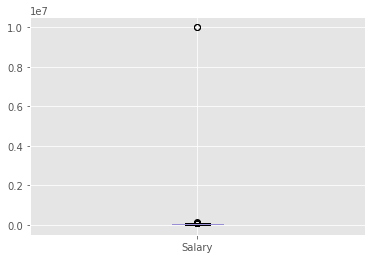

In [88]:
df.boxplot(column='Salary', return_type='axes');

In [89]:
df['Salary'].describe()

count    4.820500e+04
mean     3.484871e+04
std      6.613965e+04
min      1.149000e+01
25%      2.300000e+04
50%      3.100000e+04
75%      4.250000e+04
max      1.000000e+07
Name: Salary, dtype: float64

In [90]:
print(df['Salary'].quantile(1.0))

10000000.0


In [91]:
 df.loc[df['Salary'] >= 10000000.0]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
29984,71362423,Graduate Software Tester/ Manual Testing/ Test...,Basingstoke,UKStaffsearch,full_time,permanent,IT Jobs,10000000.0,20120615T150000,20120913T150000,ukstaffsearch.com
48601,72118735,Media Data Analyst,The City,Digital Gurus,full_time,permanent,Sales Jobs,10000000.0,20120408T000000,20120707T000000,mediaweekjobs.co.uk


In [92]:
df.drop(df[df.Salary >= 10000000.0].index, inplace=True)

In [93]:
 df.loc[df['Salary'] >= 10000000.0]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


In [94]:
df = df.dropna()
df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69019015,"Field Systems Engineer (Telephony, OO, Java, C...",Weybridge,Spectrum Recruitment,non-specified,permanent,IT Jobs,47500.0,20121027T120000,20130125T120000,cv-library.co.uk
1,69017444,Head of Architecture x **** (Please Read),UK,Capita Resourcing,non-specified,permanent,IT Jobs,87500.0,20120111T000000,20120311T000000,cv-library.co.uk
2,70758181,Finance Administration,Doncaster,Blue Arrow,non-specified,permanent,Accounting & Finance Jobs,13440.0,20120908T000000,20121207T000000,cv-library.co.uk
3,71631621,Project Engineer Automated Handling,Bedfordshire,V Consultancy,non-specified,permanent,Engineering Jobs,37500.0,20130917T150000,20131216T150000,cv-library.co.uk
4,69010433,Water Treatment Sales/Accounts Manager East M...,East Midlands,Future Select Recruitment,non-specified,permanent,Healthcare & Nursing Jobs,50000.0,20120528T150000,20120627T150000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
50697,71280413,Project Manager / Payments (essential) / Watford,UK,RDF,non-specified,permanent,IT Jobs,70000.0,20131005T150000,20131104T150000,cardandpaymentjobs.com
50698,70570237,Technology Consultant Financial Services,London,Links Resourcing,non-specified,permanent,IT Jobs,40000.0,20120201T150000,20120501T150000,cardandpaymentjobs.com
50699,66372417,Graduate Engineer (Water industry),South Lanarkshire,Carrington West Limited,full_time,contract,Engineering Jobs,20000.0,20130119T000000,20130419T000000,thegraduate.co.uk
50700,72162924,Process Engineer All levels,Surrey,Executive Recruitment Services,full_time,permanent,Engineering Jobs,47500.0,20120309T150000,20120607T150000,TotallyExec


In [95]:
update_Err("","", "Salary","N/A","nan","null","dropped as the missing rate is under 5%")
update_Err("","", "Salary","nan","nan","null","dropped as the missing rate is under 5% ")
update_Err("","", "Salary","Nan","nan","null","dropped as the missing rate is under 5% ")
update_Err("","", "Salary","","nan","null","dropped as the missing rate is under 5% ")
update_Err("","", "Salary","0","nan","null","dropped as the missing rate is under 5% ")
update_Err("","", "Salary","10000000","didn't modify","outlier","less than 0.001% of the data volume ")
update_Err("","", "Salary","10000000","didn't modify","outlier","less than 0.001% of the data volume")

In [96]:
df.isna().sum()

Id              0
Title           0
Location        0
Company         0
ContractType    0
ContractTime    0
Category        0
Salary          0
OpenDate        0
CloseDate       0
SourceName      0
dtype: int64

### Parsing Open Dates in the datetime format

In [97]:
df['OpenDate'].isna().sum()

0

In [98]:
df['OpenDate'].value_counts() # stored as an int object type

20120408T120000    41
20130626T150000    40
20120519T120000    40
20120209T150000    40
20130127T150000    38
                   ..
20121017T150000    10
20131108T000000     9
20120126T120000     9
20121026T000000     8
20122309T120000     1
Name: OpenDate, Length: 2194, dtype: int64

In [99]:
# Open Date
# converting object type into string
df['OpenDate'] = df['OpenDate'].astype(str)

In [100]:
# One value has the order of month and date swapped out.
df['OpenDate'] = df['OpenDate'].replace(['20122309T120000'], ['20120923T120000'])
df['OpenDate'] = pd.to_datetime(df['OpenDate'],format='%Y-%m-%d %H:%M:%S')
df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69019015,"Field Systems Engineer (Telephony, OO, Java, C...",Weybridge,Spectrum Recruitment,non-specified,permanent,IT Jobs,47500.0,2012-10-27 12:00:00,20130125T120000,cv-library.co.uk
1,69017444,Head of Architecture x **** (Please Read),UK,Capita Resourcing,non-specified,permanent,IT Jobs,87500.0,2012-01-11 00:00:00,20120311T000000,cv-library.co.uk
2,70758181,Finance Administration,Doncaster,Blue Arrow,non-specified,permanent,Accounting & Finance Jobs,13440.0,2012-09-08 00:00:00,20121207T000000,cv-library.co.uk
3,71631621,Project Engineer Automated Handling,Bedfordshire,V Consultancy,non-specified,permanent,Engineering Jobs,37500.0,2013-09-17 15:00:00,20131216T150000,cv-library.co.uk
4,69010433,Water Treatment Sales/Accounts Manager East M...,East Midlands,Future Select Recruitment,non-specified,permanent,Healthcare & Nursing Jobs,50000.0,2012-05-28 15:00:00,20120627T150000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
50697,71280413,Project Manager / Payments (essential) / Watford,UK,RDF,non-specified,permanent,IT Jobs,70000.0,2013-10-05 15:00:00,20131104T150000,cardandpaymentjobs.com
50698,70570237,Technology Consultant Financial Services,London,Links Resourcing,non-specified,permanent,IT Jobs,40000.0,2012-02-01 15:00:00,20120501T150000,cardandpaymentjobs.com
50699,66372417,Graduate Engineer (Water industry),South Lanarkshire,Carrington West Limited,full_time,contract,Engineering Jobs,20000.0,2013-01-19 00:00:00,20130419T000000,thegraduate.co.uk
50700,72162924,Process Engineer All levels,Surrey,Executive Recruitment Services,full_time,permanent,Engineering Jobs,47500.0,2012-03-09 15:00:00,20120607T150000,TotallyExec


In [101]:
update_Err("","", "OpenDate","20122309T120000","20120923T120000","Wrong Order of month and day","replaced with right format")
update_Err("All","All", "OpenDate","20120408T120000","20121027T120000","2012-10-27 12:00:00","replaced with right date-time format")



### Parsing Close Dates in the datetime format

In [102]:
df['CloseDate'].isna().sum()

0

In [103]:
df['OpenDate'].value_counts() # stored as an int object type

2012-04-08 12:00:00    41
2012-05-19 12:00:00    40
2013-06-26 15:00:00    40
2012-02-09 15:00:00    40
2013-08-13 15:00:00    38
                       ..
2012-12-08 12:00:00    10
2013-01-08 12:00:00    10
2013-11-08 00:00:00     9
2012-01-26 12:00:00     9
2012-10-26 00:00:00     8
Name: OpenDate, Length: 2193, dtype: int64

In [104]:
# Close Date
# converting object type into string
df['CloseDate'] = df['CloseDate'].astype(str)

In [105]:
df['CloseDate'] = pd.to_datetime(df['CloseDate'], format='%Y-%m-%d %H:%M:%S')
df.head()

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,69019015,"Field Systems Engineer (Telephony, OO, Java, C...",Weybridge,Spectrum Recruitment,non-specified,permanent,IT Jobs,47500.0,2012-10-27 12:00:00,2013-01-25 12:00:00,cv-library.co.uk
1,69017444,Head of Architecture x **** (Please Read),UK,Capita Resourcing,non-specified,permanent,IT Jobs,87500.0,2012-01-11 00:00:00,2012-03-11 00:00:00,cv-library.co.uk
2,70758181,Finance Administration,Doncaster,Blue Arrow,non-specified,permanent,Accounting & Finance Jobs,13440.0,2012-09-08 00:00:00,2012-12-07 00:00:00,cv-library.co.uk
3,71631621,Project Engineer Automated Handling,Bedfordshire,V Consultancy,non-specified,permanent,Engineering Jobs,37500.0,2013-09-17 15:00:00,2013-12-16 15:00:00,cv-library.co.uk
4,69010433,Water Treatment Sales/Accounts Manager East M...,East Midlands,Future Select Recruitment,non-specified,permanent,Healthcare & Nursing Jobs,50000.0,2012-05-28 15:00:00,2012-06-27 15:00:00,cv-library.co.uk


In [106]:
update_Err("All","All", "CloseDate","20130125T120000","2013-01-25 12:00:00","no in date-time format","replaced with right date-time format")

### Checking Open and Close dates for Integrity Constraint Violations

In [107]:
# checking for invalid dates
df[df['OpenDate'] > df['CloseDate']]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
8080,68694724,"Contracts Manager ITIL, Prince ****",Reading,Heat Recruitment,non-specified,permanent,IT Jobs,35500.0,2013-11-27 15:00:00,2013-08-29 15:00:00,totaljobs.com
11526,65186519,Principal Engineer PCBs,UK,Zebra Technical Recruitment Ltd,non-specified,permanent,Engineering Jobs,41500.0,2013-01-25 15:00:00,2012-12-26 15:00:00,totaljobs.com
30308,71449094,Supply Teachers WORK AVAILABLE IMMEDIATELY,North London,CAREER TEACHERS,full_time,contract,Teaching Jobs,33000.0,2013-06-23 00:00:00,2013-04-24 00:00:00,jobs.guardian.co.uk
38774,68806745,Engineering Project Leader,UK,Real Time Recruitment Solutions,non-specified,permanent,Engineering Jobs,37500.0,2013-07-09 15:00:00,2013-05-10 15:00:00,jobsite.co.uk
49439,68849361,Student Recruitment Assistant,UK,University of Bedfordshire,non-specified,permanent,Teaching Jobs,20764.0,2012-06-28 12:00:00,2012-03-30 12:00:00,jobstoday.co.uk


In [108]:
# Swapping open date & close date where they open date i 
df.OpenDate, df.CloseDate = np.where(df.OpenDate > df.CloseDate, 
                            [df.CloseDate, df.OpenDate], [df.OpenDate, df.CloseDate])


In [109]:
update_Err("","69019015", "CloseDate","2013-11-27 15:00:00,2013-08-29 15:00:00","2013-08-29 15:00:00,2013-11-27 15:00:00 "," Integrity Constraint Violation","replaced with right date-time format")
update_Err("","69017444", "CloseDate","2013-01-25 15:00:00, 2012-12-26 15:00:00"," 2012-12-26 15:00:00,2013-01-25 15:00:00,"," Integrity Constraint Violation","replaced with right date-time format")
update_Err("","70758181", "CloseDate","2013-06-23 00:00:00, 2013-04-24 00:00:00","2013-04-24 00:00:00,2013-06-23 00:00:00,"," Integrity Constraint Violation","replaced with right date-time format")
update_Err("","71631621", "CloseDate","2013-07-09 15:00:00, 2013-05-10 15:00:00"," 2013-05-10 15:00:0,2013-07-09 15:00:00,"," Integrity Constraint Violation","replaced with right date-time format")
update_Err("","69010433", "CloseDate","2013-07-09 15:00:00,2012-03-30 12:00:00","2012-03-30 12:00:00,2013-07-09 15:00:00,"," Integrity Constraint Violation0","replaced with right date-time format")

In [110]:
# validating the swap
df.at[8080,'OpenDate'], df.at[8080,'CloseDate']

(Timestamp('2013-08-29 15:00:00'), Timestamp('2013-11-27 15:00:00'))

In [111]:
# Checking for invalid dates again
df[df['OpenDate'] > df['CloseDate']]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


......

In [112]:
df.dtypes

Id                       int64
Title                   object
Location                object
Company                 object
ContractType            object
ContractTime            object
Category                object
Salary                 float64
OpenDate        datetime64[ns]
CloseDate       datetime64[ns]
SourceName              object
dtype: object

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [113]:
# code to save output data
df.to_csv('dataset1_solution.csv', index = False)

In [114]:
errorlist.to_csv('errorlist.csv')

## Summary

In this project, I did process of extracting data from XML files with Python built-in libraries to convert it to a csv file. Audited and cleaned the missing values along with errors. Dropped the missing values in salaries as it consists under the 5% of the data volume and 2 outliers as it only of less than 0.001% of the data volume.




